# Bae & Woo 2016 Biconical Outflow Model 3D

The manuscript that this model is based on is from Bae & Woo et al. 2016 can be found at (https://ui.adsabs.harvard.edu/abs/2016ApJ...828...97B/abstract)[https://ui.adsabs.harvard.edu/abs/2016ApJ...828...97B/abstract]  This notebook reproduces the models therein for purposes of reproducibility only.  Note that this notebook only works with Python 2 Scipy library and is not compatible with Python 3 Scipy due to the `scipy.interpolate.griddata` incompatibility. 

In [1]:
# matplotlib notebook
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import FancyArrowPatch
from matplotlib import animation
from scipy.interpolate import griddata, interp1d
from scipy.integrate import simps
from scipy.ndimage import gaussian_filter
import matplotlib.cm as cm
import os 
import shutil
import sys
import matplotlib
import time
matplotlib.rcParams['agg.path.chunksize'] = 100000
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

import biconical_outflow_model_3d as bicone # <-- Import  
# plt.style.use('dark_background')

print(np.__version__)
print(sp.__version__)

1.24.3
1.10.1


In [2]:
# Model Parameters 
A         = 0.90 # dust extinction level (0.0 - 1.0)
tau       = 3.00  # shape of flux profile. Larger number means flux drops off more rapidly.
D         = 1.0  # length of bicone (arbitrary units)
fn        = 500 # initial flux value at center

theta_in_deg  = 10.0     # inner opening angle (degrees)
theta_out_deg = 30.0    # outer opening angle (degrees)

# Velocity profile parameters
vmax= 500.0 # km/s
vtype ='constant' # 'increasing','decreasing', or 'constant'
# vtype = 'constant'
# vtype = 'increasing'

# Sampling paramters
sampling = 100 # point sampling
# 3d Plot orientation
azim = 45
elev = 15
# 2d Map options
map_interpolation = 'none'
# emission model options
obs_res = 68.9 # resolution of SDSS for emission line model
nbins = 60 # number of bins for emission line histogram 
########################################################################################

### Generate the bicone model in 3D

In [3]:

# Bicone inclination and PA
theta_B1_deg  = -60  # rotation along x. -90 means the outlow is directly along the LOS with the blue side approaching. 0 means exactly perpendicular to LOS (up-down).
theta_B2_deg  = 45     # rotation along y. Does absolutely nothing if theta_B1 is -90. Changes PA in the LOS.
theta_B3_deg  = -30     # rotation along z. Changes how directed the outflow is towards us. -90 means the outflow goes left-right instead of up-down.
# Dust plane inclination and PA
theta_D1_deg  = (theta_B1_deg + 180) % 180    # rotation along x
theta_D2_deg  = (theta_B2_deg + 180) % 180     # rotation along y
theta_D3_deg  = theta_B3_deg

import pickle
for theta_B1_deg in range(-80,-5,10): # only makes sense to be negative.
    for theta_B2_deg in range(-80,-5,10): # only makes sense to be negative.
        for theta_B3_deg in range(-80, 80, 10):

            # Bicone coordinate, flux, and velocity grids
            file = f'output_x{theta_B1_deg}y{theta_B2_deg}z{theta_B3_deg}_x{theta_D1_deg}y{theta_D2_deg}z{theta_D3_deg}.pickle'
            if not os.path.isfile(file):
                bicone_coords,dust_coords,fgrid,vgrid = bicone.generate_bicone(theta_in_deg, theta_out_deg,
                                            theta_B1_deg, theta_B2_deg, theta_B3_deg,
                                            theta_D1_deg, theta_D2_deg, theta_D3_deg,
                                            D=D, tau=tau, fn=fn, A=A,
                                            vmax=vmax, vtype=vtype,
                                            sampling=sampling,
                                            plot=False,orientation=(azim,elev),save_fig=False)
                outs = {'bicone_coords': bicone_coords,
                        'dust_coords': dust_coords,
                        'fgrid': fgrid,
                        'vgrid': vgrid,
                        'D':D,
                        'sampling': sampling}
                pickle.dump(outs, open(file,'wb'))

outs = pickle.load(open(file,'rb'))

# generate a cylindrical model for a galaxy? maybe the generated dust screen can be used to imitate the galaxy.

# TODO: generate 3d plots even when not doing the calculations

print('\n Done! \n')

### Generate the 2D flux maps

Integrated velocity = -299.8882175600345 (km/s)
Integrated velocity dispersion = 265.1312837661726 (km/s)


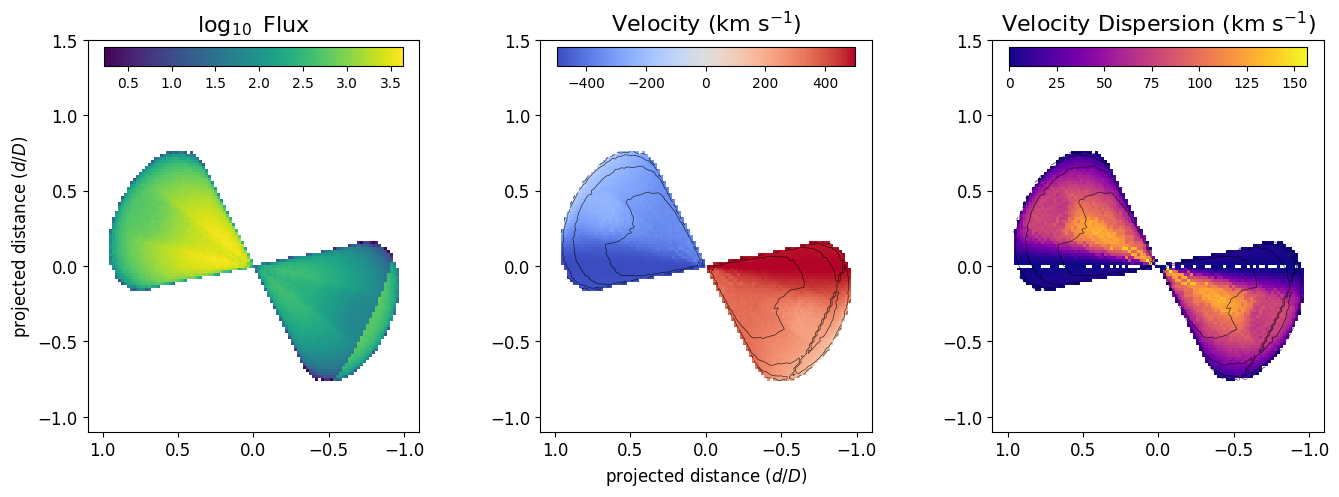

In [ ]:
# Create 2d maps
fmap, vmap, dmap,v_int,d_int = bicone.map_2d(outs['bicone_coords'],outs['dust_coords'],outs['fgrid'],outs['vgrid'],
                                             D=outs['D'],sampling=outs['sampling'],interpolation=map_interpolation,
                                             plot=True,save_fig=True)

### Generate the Emission Line Model

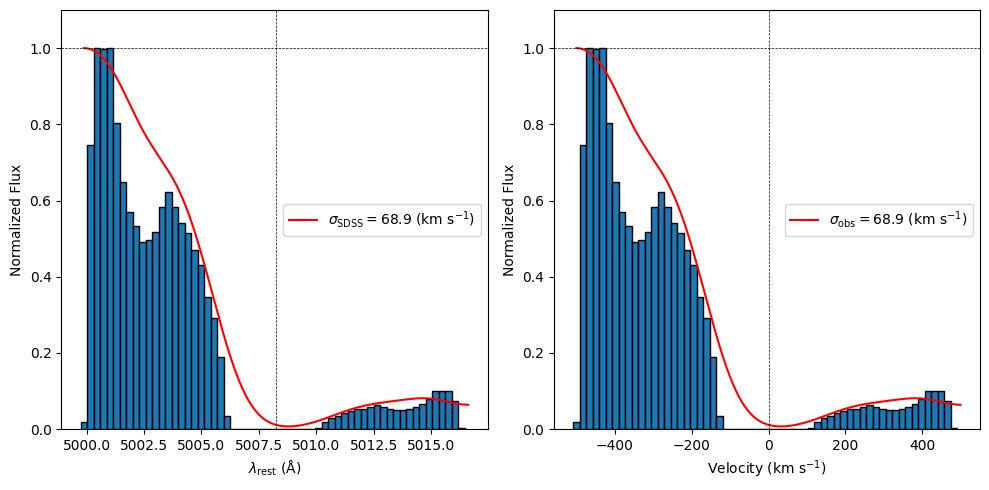

In [ ]:
# Get emission line model
x,emline = bicone.emission_model(fgrid,vgrid,vmax=vmax,obs_res=obs_res,nbins=nbins,sampling=sampling,
                                 plot=True,save_fig=True)